#Presidential State of the Union Addresses
This project is an investigation into the State of the Union addresses given by presidents in the year of an impending election wherein they were incumbents. By using supervised and unsupervised techniques, I intend to uncover trends in the word usage in these addresses to see if there are trends among the presidential speeches (unsupervised) and if these can be used to predict the outcome of the election or the percentage of popular vote received by the candidate in the election following the speech (supervised).

Presidential SOTU addresses taken from Github

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import nltk

In [0]:

Buren_upload = open ('Buren_1840.txt').read()
Cleveland_upload = open ('Cleveland_1888.txt').read()
Clinton_upload = open ('Clinton_1996.txt').read()
Jackson_upload = open ('Jackson_1832.txt').read()
Johnson_upload= open ('Johnson_1964.txt').read()
Lincoln_upload = open ('Lincoln_1864.txt').read()
Obama_upload = open ('Obama_2012.txt').read()
Reagan_upload = open ('Reagan_1984.txt').read()
Roose_1_upload = open('Roosevelt_1904.txt').read()
Roose_2_upload = open ('Roosevelt_1936.txt').read()


In [0]:
#president_SOTU = pd.read_csv(r'https://github.com/harr1582/Presidential-SOTU/blob/master/Buren_1840.txt')

## Cleaning


In [0]:
#Takes apart the dictionary into just values and returns to variable assigned
Buren_upload = Buren_upload.lower()
Cleveland_upload = Cleveland_upload.lower()
Clinton_upload = Clinton_upload.lower()
Jackson_upload = Jackson_upload.lower()
Johnson_upload = Johnson_upload.lower()
Lincoln_upload = Lincoln_upload.lower()
Obama_upload = Obama_upload.lower()
Reagan_upload = Reagan_upload.lower()
Roose_1_upload = Roose_1_upload.lower()
Roose_2_upload = Roose_2_upload.lower()


In [0]:

#Getting rid of newlines and first random letter/space

roose_str = re.sub(r'\n', ' ', Roose_1_upload)
clint_str = re.sub(r'\n', ' ', Clinton_upload)
clev_loss_str =  re.sub(r'\n', ' ', Cleveland_upload)
bur_str = re.sub(r'\n', ' ', Buren_upload)
fdr_str =  re.sub(r'\n', ' ', Roose_2_upload)
linc_str =  re.sub(r'\n', ' ', Lincoln_upload)
obam_str =  re.sub(r'\n', ' ', Obama_upload)
jack_str =  re.sub(r'\n', ' ', Jackson_upload)
john_str =  re.sub(r'\n', ' ', Johnson_upload)
reag_str =  re.sub(r'\n', ' ', Reagan_upload)

roosevelt = roose_str
clinton = clint_str
cleveland =  clev_loss_str
buren = bur_str
fd_roose =  fdr_str
lincoln = linc_str
obama =  obam_str
jackson = jack_str
johnson =  john_str
reagan =  reag_str

In [6]:
reag_str

'mr. speaker, mr. president, distinguished members of the congress, honored guests, and fellow citizens:  once again, in keeping with time-honored tradition, i have come to report to you on the state of the union, and i\'m pleased to report that america is much improved, and there\'s good reason to believe that improvement will continue through the days to come.  you and i have had some honest and open differences in the year past. but they didn\'t keep us from joining hands in bipartisan cooperation to stop a long decline that had drained this nation\'s spirit and eroded its health. there is renewed energy and optimism throughout the land. america is back, standing tall, looking to the eighties with courage, confidence, and hope.  the problems we\'re overcoming are not the heritage of one person, party, or even one generation. it\'s just the tendency of government to grow, for practices and programs to become the nearest thing to eternal life we\'ll ever see on this earth. and there\'

Parsing

In [0]:
import spacy
nlp = spacy.load('en')


# All the processing work is done here, so it may take a while.
roosevelt = nlp(roosevelt)
clinton= nlp(clinton)
cleveland = nlp(cleveland)
buren = nlp(buren)
fd_roose = nlp(fd_roose)
lincoln = nlp(lincoln)
obama = nlp(obama)
jackson = nlp(jackson)
johnson = nlp(johnson)
reagan = nlp(reagan)

## Exploration


In [8]:
# Let's explore the objects we've built.
print("The roose object is a {} object.".format(type(roosevelt)))
print("It is {} tokens long".format(len(roosevelt)))
print("The first three tokens are '{}'".format(roosevelt[:3]))
print("The type of each token is {}".format(type(roosevelt[0])))

The roose object is a <class 'spacy.tokens.doc.Doc'> object.
It is 19244 tokens long
The first three tokens are 'to the senate'
The type of each token is <class 'spacy.tokens.token.Token'>


In [9]:
#Find the most common words

from collections import Counter

# Utility function to calculate how frequently words appear in the text.
def word_frequencies(text, include_stop=True):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in text:
      if token.text == 'The':
        print(token)
        print(token.is_stop)
        return Counter(words)
      if not token.is_punct and (not token.is_stop or include_stop):
        words.append(token.text)
            
            
    # Build and return a Counter object containing word counts.
    return Counter(words)
    
# The most frequent words:
roose_freq = word_frequencies(roosevelt).most_common(10)

print(roose_freq)


[('the', 1430), ('of', 916), ('and', 620), ('to', 575), ('in', 505), ('be', 254), ('a', 247), ('is', 245), ('that', 186), ('for', 176)]


In [10]:
spacy.__version__

'2.1.4'

In [0]:
#!pip install spacy -U

Code still including stop words (?) based on caps. Including spaces as well

In [12]:
# Use our optional keyword argument to remove stop words.
roose_freq = word_frequencies(roosevelt, include_stop=False).most_common(10)

print('Roose:', roose_freq)


Roose: [(' ', 118), ('government', 58), ('work', 50), ('states', 47), ('great', 45), ('good', 39), ('people', 38), ('law', 38), ('congress', 38), ('nation', 36)]


In [13]:
# Utility function to calculate how frequently lemas appear in the text.
def lemma_frequencies(text, include_stop=True):
    
    # Build a list of lemas.
    # Strip out punctuation and, optionally, stop words.
    lemmas = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            lemmas.append(token.lemma_)
            
    # Build and return a Counter object containing word counts.
    return Counter(lemmas)

# Instantiate our list of most common lemmas.
roose_lemma_freq = lemma_frequencies(roosevelt, include_stop=False).most_common(10)

print('Roose Lemmas:', roose_lemma_freq)


Roose Lemmas: [(' ', 118), ('state', 68), ('man', 65), ('government', 63), ('law', 61), ('great', 54), ('work', 54), ('nation', 49), ('good', 42), ('people', 40)]


In [14]:
# Initial exploration of sentences.
sentences = list(roosevelt.sents)
print("Roosevelt's State of the Union Address has {} sentences.".format(len(sentences)))

example_sentence = sentences[2]
print("Here is an example: \n{}\n".format(example_sentence))
print('\nParts of speech:')
for token in example_sentence[:9]:
    print(token.orth_, token.pos_)
    print('\nDependencies:')
for token in example_sentence[:9]:
    print(token.orth_, token.dep_, token.head.orth_)

Roosevelt's State of the Union Address has 530 sentences.
Here is an example: 
the people have emphatically expressed their approval of the principles underlying these policies, and their desire that these principles be kept substantially unchanged, although of course applied in a progressive spirit to meet changing conditions.  


Parts of speech:
the DET

Dependencies:
people NOUN

Dependencies:
have VERB

Dependencies:
emphatically ADV

Dependencies:
expressed VERB

Dependencies:
their DET

Dependencies:
approval NOUN

Dependencies:
of ADP

Dependencies:
the DET

Dependencies:
the det people
people nsubj expressed
have aux expressed
emphatically advmod expressed
expressed ROOT expressed
their poss approval
approval dobj expressed
of prep approval
the det principles


In [15]:
# Extract the first ten entities.
entities = list(roosevelt.ents)[0:10]
for entity in entities:
    print(entity.label_, ' '.join(t.orth_ for t in entity))

ORDINAL second
DATE the last half century
CARDINAL one
CARDINAL fifty - seventh
ORDINAL second
NORP american
TIME the hours
DATE 1901
DATE monthly
DATE march 2 , 1903


In [16]:
people = [entity.text for entity in list(roosevelt.ents) if entity.label_ == "PERSON"]
print(set(people))

set()


In [17]:
# Look at some metrics around this sentence.
example_words = [token for token in example_sentence if not token.is_punct]
unique_words = set([token.text for token in example_words])

print(("There are {} words in this sentence, and {} of them are"
       " unique.").format(len(example_words), len(unique_words)))

There are 36 words in this sentence, and 31 of them are unique.


##Getting ready to model

In [18]:
roose_sents = [[sent, "T_Roosevelt", 56.4, 1904, 1] for sent in roosevelt.sents]
clint_sents = [[sent, "Clinton", 49.2, 1996, 1] for sent in clinton.sents]
clev_sents = [[sent, "Cleveland", 48.6, 1888, 0] for sent in cleveland.sents]
buren_sents = [[sent, "Buren", 46.8, 1840, 0] for sent in buren.sents]
fd_roose_sents = [[sent, "F_Roosevelt", 60.2, 1936, 1] for sent in fd_roose.sents]
linc_sents = [[sent, "Lincoln", 55.0, 1864, 1] for sent in lincoln.sents]
obama_sents =[[sent, "Obama", 50.9, 2012, 1] for sent in obama.sents]
jackson_sents = [[sent, "Jackson", 54.2, 1832, 1] for sent in jackson.sents]
johnson_sents = [[sent, "Johnson", 61.1, 1964, 1] for sent in johnson.sents]
reagan_sents = [[sent, "Reagan", 58.8, 1984, 1] for sent in reagan.sents]


sentences = pd.DataFrame(roose_sents + clint_sents + clev_sents + buren_sents + fd_roose_sents + linc_sents + obama_sents + jackson_sents + johnson_sents + reagan_sents)
sentences.head()

,0,1,2,3,4
0,"(to, the, senate, and, house, of, representati...",T_Roosevelt,56.4,1904,1
1,"(such, prosperity, is, of, course, primarily, ...",T_Roosevelt,56.4,1904,1
2,"(the, people, have, emphatically, expressed, t...",T_Roosevelt,56.4,1904,1
3,"(the, enlargement, of, scope, of, the, functio...",T_Roosevelt,56.4,1904,1
4,"(battle, ships, and, forts, ,, public, buildin...",T_Roosevelt,56.4,1904,1


In [0]:
sentences['text_sentence']= sentences[0]
sentences['president']= sentences[1]
sentences['popular_vote']=sentences[2]
sentences['year']=sentences[3]
sentences['outcome']=sentences[4]

In [0]:
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(2000)]

In [0]:
 
# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['president'] = sentences[1]
    df['popular_vote'] = sentences[2]
    df['year']= sentences[3]
    df['outcome'] = sentences[4]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
    return df

# Set up the bags.
roose_words = bag_of_words(roosevelt)
clint_words = bag_of_words(clinton)
clev_words = bag_of_words(cleveland)
bur_words = bag_of_words(buren)
fd_roose_words = bag_of_words(fd_roose)
linc_words = bag_of_words(lincoln)
obam_words = bag_of_words(obama)
jackson_words = bag_of_words(jackson)
john_words = bag_of_words(johnson)
reagan_words = bag_of_words(reagan)


# Combine bags to create a set of unique words.
common_words = set(roose_words + clint_words + clev_words + bur_words + fd_roose_words + linc_words + obam_words + jackson_words + john_words + reagan_words)

In [0]:
word_counts = bow_features(sentences, common_words)
word_counts.head()

## Setting up target and data

In [0]:
target = word_counts['year']
data = np.array(word_counts.drop(['text_sentence','president', 'year', 'popular_vote', 'outcome'], 1))
#data = np.array(word_counts.drop(['text_sentence','president'], 1))

#Kmeans
Divide into training and test sets and normalize X. Y_pred is a fitting to KMeans?

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 42 )

X_norm = normalize(X_train)

# Reduce it to two components.
#X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=10, random_state=42).fit_predict(X_norm)

# Plot the solution.
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
# plt.show()

# Check the solution against the data.
# print('Comparing k-means clusters against the data:')
# print(pd.crosstab(y_pred, y_train))
len(X_train)
len(X_norm)

795

In [36]:
print (len(X_train))
print (len(X_norm))

795
795


#Random Forest for feature selection

In [0]:

from sklearn import ensemble
RandForest= ensemble.RandomForestRegressor()

RandForest.fit(data, target)

RandForest.feature_importances_
RandForest_ft_series = pd.Series(data=RandForest.feature_importances_)
###################################
sorted_series = RandForest_ft_series.sort_values(ascending = False)
sorted_series


##Sort series based on random forest ranking 

In [0]:
df_combined = pd.concat([sorted_series, word_counts], axis=1)
df_combined = df_combined.dropna()
df_combined = df_combined.sort_values([0], ascending = False)


# df_combined.columns = ['values', 'words', 'president', 'pop_vote', 'year', 'outcome']
# df_combined = df_combined.sort_values('values', ascending = False)
# df_combined = df_combined.dropna()
df_combined

In [0]:
#Find where the feature significance is less than or equal to .0001 in a sorted list

print (next(x[0] for x in enumerate(df_combined[0]) if x[1] <= .00001))



ft_sel_df = df_combined.iloc[:1061, :]

ft_sel_df
#ft_sel_df['popular_vote']

Where did 'president', 'year', 'etc' go?

#Evaluating how many clusters are needed.

In [28]:
target = ft_sel_df['popular_vote']

data =  np.array(ft_sel_df.drop(['text_sentence', 'popular_vote'], 1))

data




array([[0.05360937, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00878637, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00835707, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [38]:
X_norm.shape

(795, 5481)

In [29]:


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 42 )
type(X_train)

numpy.ndarray

Had a hard time getting this to work before realizing that the 'text_sentence' in the dataframe was throwing off the array so I elimated that from 'data'

##Silhouette eval for clusters
4 clusters is best

In [61]:
#KMeans: Checking consistency of coefficients for 4 clusters with Silhouette

from sklearn.model_selection import train_test_split

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    y_pred,
    test_size=0.5,
    random_state=42)


X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

from sklearn import metrics
from sklearn.metrics import pairwise_distances

sil_2 = []

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    sil_2.append(metrics.silhouette_score(sample, labels, metric='euclidean'))

sil_3 = []

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=3, random_state=42).fit(sample)
    labels = model.labels_
    sil_3.append(metrics.silhouette_score(sample, labels, metric='euclidean'))

    
sil_4 = []

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=4, random_state=42).fit(sample)
    labels = model.labels_
    sil_4.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    
    
sil_5 = []

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=5, random_state=42).fit(sample)
    labels = model.labels_
    sil_5.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    
sil_10 = []

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=10, random_state=42).fit(sample)
    labels = model.labels_
    sil_10.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    
print('Cross val of 2 clusters:', sil_2)
print('Stdev of  clusters:', np.std(sil_2))
    
print('\nCross val of 3 clusters:', sil_3)
print('Stdev of  clusters:', np.std(sil_3))
    
print('\nCross val of 4 clusters:', sil_4)
print('Stdev of 4 clusters:', np.std(sil_4))

    
print('\nCross val of 5 clusters:', sil_5)
print('Stdev of 5 clusters:', np.std(sil_5))

print('\nCross val of 10 clusters:', sil_10)
print('Stdev of 10 clusters:', np.std(sil_10))

#

Cross val of 2 clusters: [0.019148450779945515, 0.022589831403130374, 0.0190421234975708, 0.018375117332123585]
Stdev of  clusters: 0.0016440687716452636

Cross val of 3 clusters: [0.01769480980674509, 0.02247499266294437, 0.019468748598884093, 0.017372563225150437]
Stdev of  clusters: 0.0020243383563791463

Cross val of 4 clusters: [0.015566676532518435, 0.021121050759425445, 0.01787516607393716, 0.017532873398684336]
Stdev of 4 clusters: 0.001993333821312979

Cross val of 5 clusters: [0.01174722695411197, 0.02202573617142918, 0.01796819145202793, 0.016854072026260363]
Stdev of 5 clusters: 0.0036646884151399074

Cross val of 10 clusters: [0.011802700544011158, 0.025837228704397506, 0.01796029401199136, 0.012390771383092272]
Stdev of 10 clusters: 0.0056408258607965655


##Elbow Plot
Two clusters appears to be best which disagrees with the silhouette analysis. Two clusters seems silly.

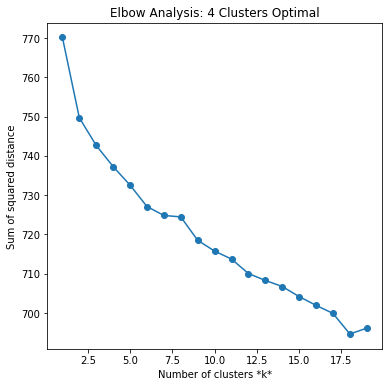

In [32]:
#Elbow plot
sse = []
list_k = list(range(1, 20 ))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_norm)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')

plt.ylabel('Sum of squared distance')
plt.title('Elbow Analysis: 4 Clusters Optimal');

#Forming Clusters

##Cluster with KMeans using PCA to 2 variables


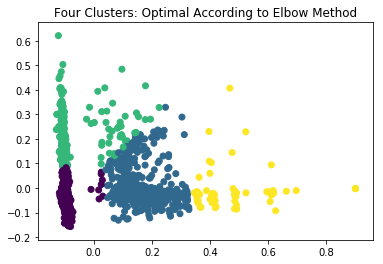

Stdev: 0.859377215456484
col_0          0   1   2   3
1                           
Buren         58  28  52   1
Cleveland     57  90  33   2
Clinton      185  56  13  32
F_Roosevelt   87  30  11   4
Jackson       67  42  41   0
Johnson       48  47   1   7
Lincoln       83  43  26  10
Obama        224  62   7  15
Reagan       160  45  16  13
T_Roosevelt  256  71  58   5


In [74]:
target = sentences[1]
data = np.array(word_counts.drop(['text_sentence','president', 'year', 'popular_vote', 'outcome'], 1))
#data = np.array(word_counts.drop(['text_sentence','president'], 1))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 42 )

X_norm = normalize(X_train)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:,1], c=y_pred)
plt.title('Four Clusters: Optimal According to Elbow Method')
plt.show()
print ('Stdev:', y_pred.std())
print(pd.crosstab(y_train, y_pred))


##tSNE

In [0]:
#tSNE clustering

X_embedded = TSNE(n_components=2).fit_transform(X_train)


print(pd.crosstab(y_train, y_pred))

In [43]:
print (X_embedded.shape)
print (y_train.shape)

(795, 2)
(795,)


In [0]:
#transpose X_embedded array. * = tuple, split and plot (tuple unpacking)
import seaborn as sns

plt.scatter(*X_embedded.T)



In [0]:
import seaborn as sns

color_palette = sns.color_palette('deep',  len(pd.Series(y_pred).value_counts()))
cluster_colors = [color_palette[x] if x>=0 else (0.5,0.5,0.5) for x in y_pred]
plt.scatter(*X_embedded.T, c=cluster_colors)

In [0]:
y_train.value_counts

In [0]:
for_show_in_plot = preprocessing.LabelEncoder().fit_transform(y_train)

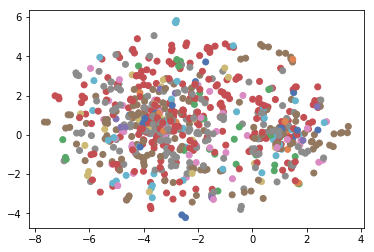

In [57]:
import seaborn as sns

color_palette = sns.color_palette('deep',  len(pd.Series(for_show_in_plot).value_counts()))
cluster_colors = [color_palette[x] if x>=0 else (0.5,0.5,0.5) for x in for_show_in_plot]
plt.scatter(*X_embedded.T, c=cluster_colors)

In [59]:
len(pd.Series(for_show_in_plot).value_counts())

10

##MeanShift: not going to have appropriate clusters with this code as the scatter plot is only taking 2 columns out of 5000+. need to reduce with PCA or another method

In [1]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, labels))


NameError: ignored

AttributeError: ignored

# **Modeling**

## Random Forest

In [0]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

rfc = ensemble.RandomForestClassifier()

train_rfc = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

##Lasso

In [0]:
from sklearn import linear_model
lass = linear_model.Lasso(alpha=.35)   #will need to optimize. see coral code
lassfit = lass.fit(data, sentences[3])

print('R^2 for Lasso:', lass.score(data, sentences[3]))


##Trying Log Regression with Bag of Words

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2') # No need to specify l2 as it's the default. But we put it for demonstration.
train = lr.fit(X_train, y_train)
print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

In [0]:
rfc = ensemble.RandomForestClassifier()

train = rfc.fit(X_train, y_train)

lr = LogisticRegression(penalty='l2') # No need to specify l2 as it's the default. But we put it for demonstration.
train = lr.fit(X_train, y_train)
print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

In [0]:
#Add XGBoost
#LightGBM

##Gradient Boost

In [0]:
clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

#Unsupervised model

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(sentences, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.1, # drop words that occur in more than .1 the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )





In [0]:
for each in sentences:
  str(each)

In [0]:

#Applying the vectorizer
pres_vec =vectorizer.fit_transform(sentences[0])
print("Number of features: %d" % pres_vec.get_shape()[1])

#splitting into training and test sets
X_train_vec, X_test_vec= train_test_split(pres_vec, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_vec_read = X_train_vec.tocsr()

#number of sentences
n = X_train_vec_read.shape[0]
#A list of dictionaries, one per sentence
tfidf_bysent = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each sentence, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_vec_read.nonzero()):
    tfidf_bysent[i][terms[j]] = X_train_vec_read[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print(n)
print(tfidf_bysent)


In [0]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_vec)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of sentences our solution considers similar, for the first five identified topics
sents_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(sents_by_component.loc[:,i].sort_values(ascending=False)[0:10])z
    




In [0]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])